In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_dir = '/content/drive/MyDrive/data/train'
validation_dir = '/content/drive/MyDrive/data/validation'

Found 2405 images belonging to 3 classes.
Found 610 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 220s 3s/step - accuracy: 0.3315 - loss: -0.8048 - val_accuracy: 0.3372 - val_loss: -96.7139
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3750 - loss: -220.9077 - val_accuracy: 0.5000 - val_loss: -696.5234
Epoch 3/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.3266 - loss: -389.9644 - val_accuracy: 0.3454 - val_loss: -15780.4805
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - accuracy: 0.4062 - loss: -2333.1533 - val_accuracy: 0.0000e+00 - val_loss: 19642.2363
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.3169 - loss: -312.1308 - val_accuracy: 0.3438 - val_loss: -2108.8132
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.4375 - loss: 12.6556 - val_accuracy: 0.0000e+00 - val_loss: 4887.6143
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.3453 - loss: -8873.4775 - val_accuracy: 0.3470 - val_loss: -93054.5234
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 772us/step - accuracy: 0.3750 - loss: 97335.8359 - val_accuracy: 0.5000 - val_loss: -280315.2812
Epoch 9/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.3260 - loss: -96921.3828 - val_accuracy: 0.3438 - val_loss: -497579.7500
Epoch 10/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 767us/step - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Raw prediction score for image '/content/89892.jpg': 1.0


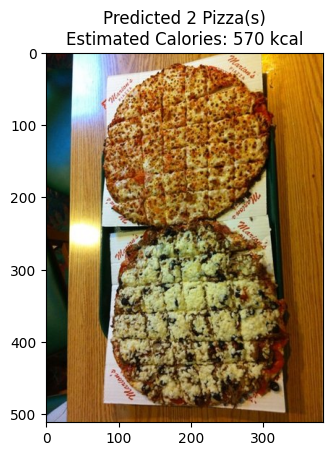

Number of Pizzas: 2
Total Calories: 570 kcal
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 625ms/step
[[  1 199   0]
 [  4 206   0]
 [  3 197   0]]
              precision    recall  f1-score   support

           0       0.12      0.01      0.01       200
           1       0.34      0.98      0.51       210
           2       0.00      0.00      0.00       200

    accuracy                           0.34       610
   macro avg       0.16      0.33      0.17       610
weighted avg       0.16      0.34      0.18       610



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from PIL import Image
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Define Image Parameters and Data Paths
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Specify paths to your dataset (update paths accordingly)
train_dir = '/content/drive/MyDrive/data/train'
validation_dir = '/content/drive/MyDrive/data/validation'

# Step 2: Create Data Generators for Training and Validation with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Step 3: Build a Simple CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output (1 pizza or 2 pizzas)
])

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model for 5 Epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Step 6: Save the Model After Training
model.save("pizza_detector_model.h5")

# Step 7: Define Calorie Mapping
calorie_mapping = {
    'pizza': 285
}

# Step 8: Load and Preprocess the Local Image
def preprocess_image(image_path, img_height=150, img_width=150):
    try:
        img = Image.open(image_path).convert('RGB')
        img_resized = img.resize((img_width, img_height))
        img_array = np.array(img_resized) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        print(f'Error loading image: {e}')
        return None

# Step 9: Predict the Number of Pizzas and Calculate Calories
def predict_and_calculate_calories(image_path, model):
    # Preprocess the local image
    img_array = preprocess_image(image_path)

    if img_array is None:
        print("Image could not be processed.")
        return

    # Predict the class (pizza) based on the image
    predictions = model.predict(img_array)
    predicted_class_index = int(np.round(predictions[0][0]))

    # Print the raw prediction score
    print(f"Raw prediction score for image '{image_path}': {predictions[0][0]}")

    # Assuming binary classification: 1 pizza or 2 pizzas
    num_pizzas = 1 if predicted_class_index == 0 else 2

    # Calculate total calories
    total_calories = calorie_mapping['pizza'] * num_pizzas

    # Display the image and prediction
    plt.imshow(Image.open(image_path))
    plt.title(f'Predicted {num_pizzas} Pizza(s)\nEstimated Calories: {total_calories} kcal')
    plt.show()

    # Output the result
    print(f'Number of Pizzas: {num_pizzas}')
    print(f'Total Calories: {total_calories} kcal')

# Step 10: Predict and Compare Two Images
local_image_paths = ['/content/89892.jpg']  # Update these paths to your images

for image_path in local_image_paths:
    predict_and_calculate_calories(image_path, model)

# Step 11: Evaluate the Validation Set and Generate a Classification Report
val_predictions = model.predict(validation_generator)
val_labels = validation_generator.classes
val_pred_classes = np.round(val_predictions).astype(int)

# Confusion matrix and classification report
print(confusion_matrix(val_labels, val_pred_classes))
print(classification_report(val_labels, val_pred_classes))


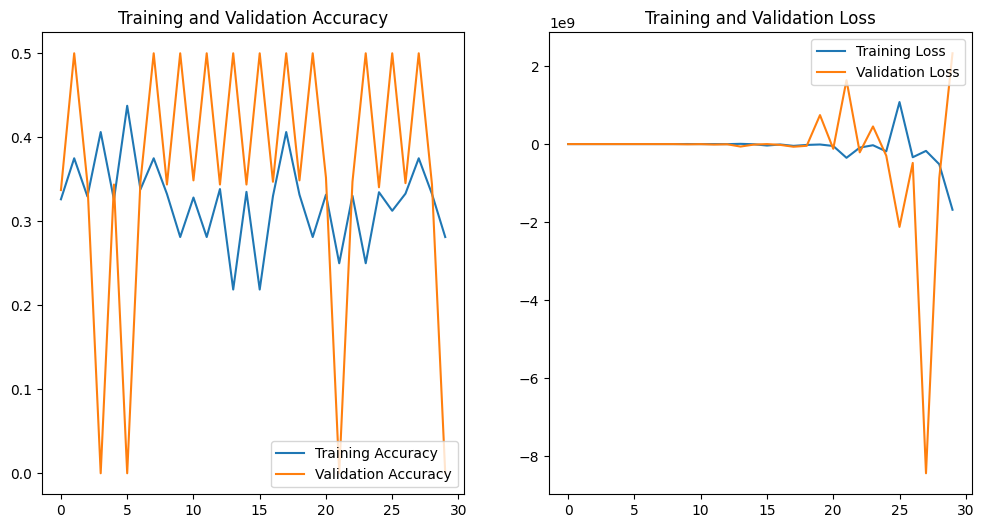

In [10]:
# Step 12: Plot the Training and Validation Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Show the plots
plt.show()
